# Problema 1 - Monty Hall

Descrierea problemei

- Avem 3 usi, in spatele carora sunt aleatoriu 2 capre si o masina.
- Tu ca si jucator alegi o usa, dar gazda show-ului (Monty Hall) iti va deschide una din celelalte 2 usi ramase. Trebuie mentionat ca Monty Hall (gazda) stie ce se afla in spatele fiecarei usi si va alege o usa cu o capra ca sa ti-o arate.
- Dupa ce iti arata usa cu capra, Monty Hall iti ofera posibilitatea sa schimbi usa?
- What do you do?

## Explicatie:

1. Sansele sa alegi o usa cu o masina in spate sunt de 1/3, si de 2/3 sa fie ales o usa cu o capra in spate. Echivalent, sansele ca masina sa fie in spatele celorlalte 2 usi e de 2/3.

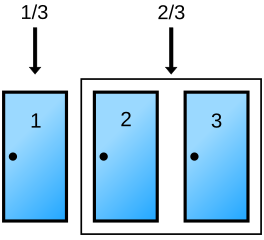

2. Monty Hall ne arata usa numarul 3, si astefel stim ca probabilitatea ca sa fie o masina acolo devine 0.

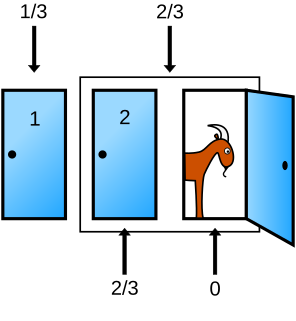

3. Astfel, probabilitatea ca usa numarul 2 sa aiba o masina in spate este 2/3. Decizia matematica ar fi sa alegem usa numarul 2 in acest moment.

## Modelarea Problemei

Contestans = {1, 2, 3}
Host       = {1, 2, 3}
Prize      = {1, 2, 3}

P(P=1) = P(P=2) = P(P=3) = 1/3
P(C=1) = P(C=2) = P(C=3) = 1/3

Aici este o retea Bayesian pentru jocul nostru. Hostul ca sa poata sa faca o alegere are nevoie sa stie ce e in spatele usilor (Prize) si ce alege jucatorul (Contestans)
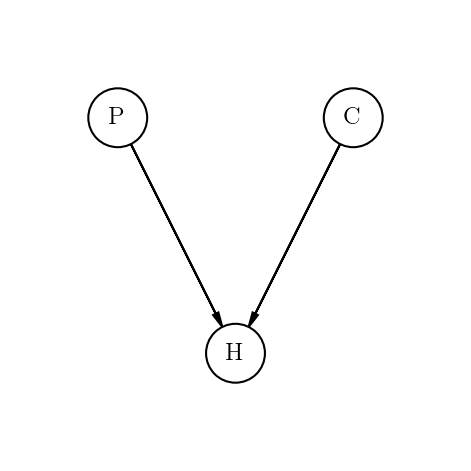


In [ ]:
P(C):
+----------+----------+-----------+-----------+
|    C     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(P):
+----------+----------+-----------+-----------+
|    P     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(H | P, C):
+------+------+------+------+------+------+------+------+------+------+
|   C  |          0         |          1         |          2         |
+------+------+------+------+------+------+------+------+------+------+
|   P  |   0  |   1  |   2  |   0  |   1  |   2  |   0  |   1  |   2  |
+------+------+------+------+------+------+------+------+------+------+
|  H=0 |   0  |   0  |   0  |   0  |  0.5 |   1  |   0  |   1  |  0.5 |
+------+------+------+------+------+------+------+------+------+------+
|  H=1 |  0.5 |   0  |   1  |   0  |   0  |   0  |   1  |   0  |  0.5 |
+------+------+------+------+------+------+------+------+------+------+
|  H=2 |  0.5 |   1  |   0  |   1  |  0.5 |   0  |   0  |   0  |   0  |
+------+------+------+------+------+------+------+------+------+------+

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Structura retelei Bayesiene
model = BayesianNetwork([("C", "H"), ("P", "H")])

# Defining the CPDs:
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

# Verificam Modelul de inferenta
model.add_cpds(cpd_c, cpd_p, cpd_h)

In [3]:
# Verificam ca acest model este valid si nu avem erori
model.check_model()

True

In [4]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 1, "H": 2})

print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.6667 |
+------+----------+
| P(1) |   0.3333 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+
